[2024-08-16 Fiddler](https://thefiddler.substack.com/p/how-high-can-you-jump)
====================
Let $a+b = 1$.

The height is

In [1]:
%display latex
y(theta) = cos(theta)
y

theta |--> cos(theta)

Then, the vertical center of mass is

In [2]:
a = integral(y,theta,-pi/2,pi/2)/pi
(a,numerical_approx(a))

(2/pi, 0.636619772367581)

And the ratio is

In [3]:
b = 1-a
((a/b).simplify_full(),numerical_approx(a/b))

(2/(pi - 2), 1.75193839388411)

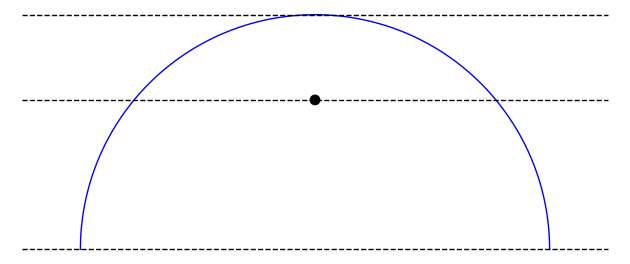

In [4]:
plot(sqrt(1-x^2),x,-1,1,axes=false) + circle((0,a),0.02,fill=true,color='black') \
  + plot([0,a,1],x,-1.25,1.25,axes=false,linestyle='dashed',color='black')

Extra credit
------------
Let $a + b = 1 - \cos\phi$.

In [5]:
phi = var('phi')
b = 1 - integral(y, theta, -phi, phi)/(2*phi)
b

-sin(phi)/phi + 1

In [6]:
a = 1 - b - cos(phi)
(a/b).simplify_full()

-(phi*cos(phi) - sin(phi))/(phi - sin(phi))

It looks like the ratio approaches 2 for small $\phi$

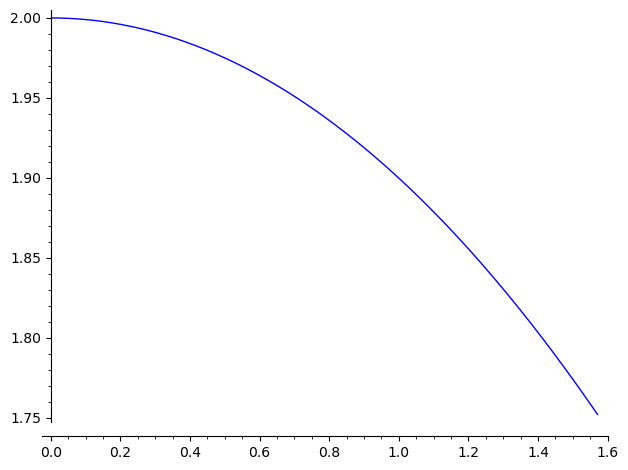

In [7]:
plot(a/b, phi, 0, pi/2)

But, zooming in on small $\phi$, there's wild oscillation.  That might be numerical noise.

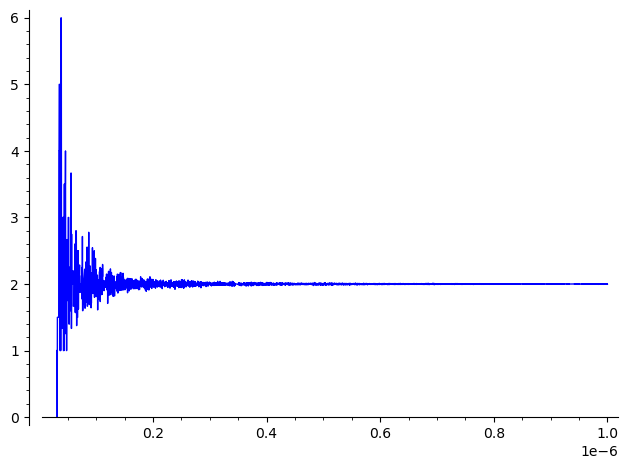

In [8]:
plot(a/b, phi, 0, 1e-6)

Taking the power series expansion around $\phi=0$,

In [9]:
(a/b).series(phi,3).simplify()

-1/10*phi + 2/phi + Order(phi^3)

The $2/\phi$ term seems like some weird artifact.  Let's try something

In [10]:
(a/b).simplify_full().series(phi,3)

2 + (-1/10)*phi^2 + Order(phi^3)

That convinces me that the ratio approaches 2 rather than $2/\phi$, and there's some bug
in the power series algorithm.  That also cleans up some of the numerical noise.

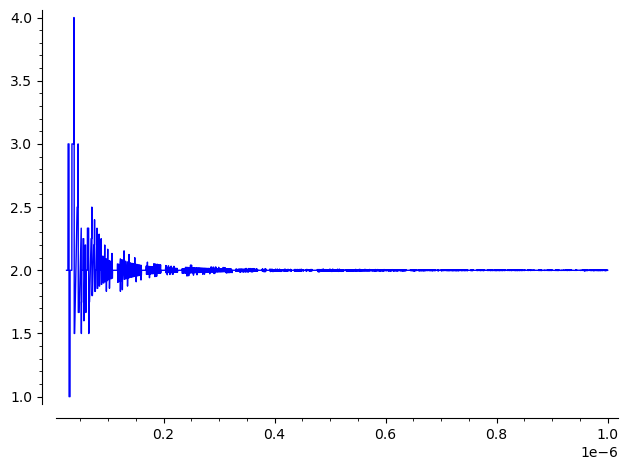

In [11]:
plot((a/b).simplify_full(), phi, 0, 1e-6)

Look at some plots for a few different values of $\phi$

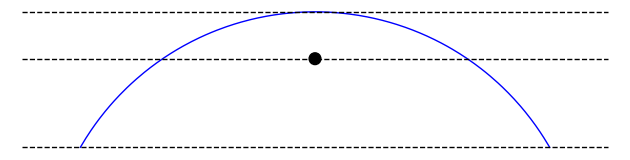

In [12]:
phi0 = pi/3
plot(sqrt(1-x^2),x,-sin(phi0),sin(phi0),axes=false) + circle((0,1-b(phi=phi0)),0.025*sin(phi0),fill=true,color='black') \
  + plot([cos(phi0),1-b(phi=phi0),1],x,-1.25*sin(phi0),1.25*sin(phi0),linestyle='dashed',color='black')

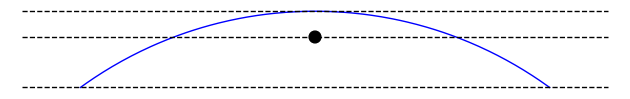

In [13]:
phi0 = pi/5
plot(sqrt(1-x^2),x,-sin(phi0),sin(phi0),axes=false) + circle((0,1-b(phi=phi0)),0.025*sin(phi0),fill=true,color='black') \
  + plot([cos(phi0),1-b(phi=phi0),1],x,-1.25*sin(phi0),1.25*sin(phi0),linestyle='dashed',color='black')

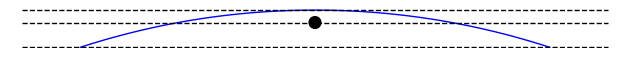

In [14]:
phi0 = pi/10
plot(sqrt(1-x^2),x,-sin(phi0),sin(phi0),axes=false) + circle((0,1-b(phi=phi0)),0.025*sin(phi0),fill=true,color='black') \
  + plot([cos(phi0),1-b(phi=phi0),1],x,-1.25*sin(phi0),1.25*sin(phi0),linestyle='dashed',color='black')

For even smaller $\phi$, I have to stretch the plot vertically to be able to see the
different heights.

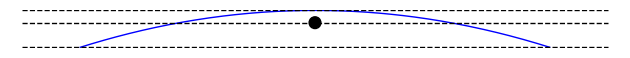

In [15]:
phi0 = pi/50
plot(sqrt(1-x^2),x,-sin(phi0),sin(phi0),axes=false,aspect_ratio=5) + ellipse((0,1-b(phi=phi0)),0.025*sin(phi0),0.005*sin(phi0),fill=true,color='black') \
  + plot([cos(phi0),1-b(phi=phi0),1],x,-1.25*sin(phi0),1.25*sin(phi0),linestyle='dashed',color='black')

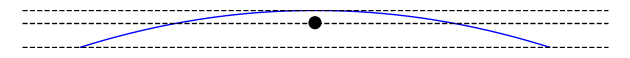

In [16]:
phi0 = pi/100
plot(sqrt(1-x^2),x,-sin(phi0),sin(phi0),axes=false,aspect_ratio=10) + ellipse((0,1-b(phi=phi0)),0.025*sin(phi0),0.0025*sin(phi0),fill=true,color='black') \
  + plot([cos(phi0),1-b(phi=phi0),1],x,-1.25*sin(phi0),1.25*sin(phi0),linestyle='dashed',color='black')

And $2-\phi^2/10$ is very good approximation for the ratio all the way up to $\phi=\pi/2$.

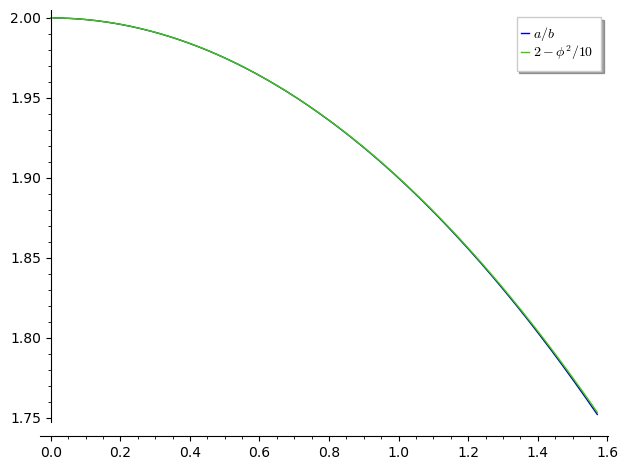

In [17]:
plot([a/b,2-phi^2/10],phi,0,pi/2,legend_label=['$a/b$','$2-\phi^2/10$'])